# Setup & Load & Transform

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium import plugins
import branca.colormap as cm
import requests
from IPython.display import display, HTML, Markdown
from datetime import time
from scipy.stats import probplot
import folium
from folium.plugins import HeatMap
from IPython.display import display, Markdown
import ipywidgets as widgets
from IPython.display import clear_output

df = pd.read_csv('../data/NYPD_Complaint_Data_Historic.csv')

In [41]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,298690695,12/30/2024,08:55:00,12/30/2024,09:30:00,18,12/31/2024,109,GRAND LARCENY,443,...,M,NaN,40.764668,-73.976952,"(40.764668, -73.976952)",PATROL BORO MAN SOUTH,(null),25-44,WHITE HISPANIC,M
1,298704236,12/30/2024,07:30:00,12/31/2024,19:32:00,44,12/31/2024,341,PETIT LARCENY,343,...,(null),NaN,40.830365,-73.927420,"(40.830365, -73.92742)",PATROL BORO BRONX,(null),18-24,BLACK,M
2,298704228,12/30/2024,15:00:00,12/30/2024,15:50:00,42,12/31/2024,109,GRAND LARCENY,443,...,U,NaN,40.835649,-73.885610,"(40.835649, -73.88561)",PATROL BORO BRONX,(null),25-44,BLACK,M
3,298695201,12/31/2024,21:00:00,12/31/2024,21:30:00,78,12/31/2024,109,GRAND LARCENY,443,...,M,NaN,40.680578,-73.974919,"(40.680578, -73.974919)",PATROL BORO BKLYN SOUTH,(null),25-44,ASIAN / PACIFIC ISLANDER,M
4,298702375,12/31/2024,03:00:00,12/31/2024,06:00:00,42,12/31/2024,109,GRAND LARCENY,443,...,U,NaN,40.822428,-73.908321,"(40.822428, -73.908321)",PATROL BORO BRONX,(null),25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80491,10008716,01/04/2006,09:40:00,01/04/2006,13:45:00,78,01/04/2006,341,PETIT LARCENY,343,...,(null),NaN,40.683447,-73.978972,"(40.683447, -73.978972)",PATROL BORO BKLYN SOUTH,(null),25-44,WHITE,M
80492,10008717,01/04/2006,12:00:00,01/04/2006,15:00:00,78,01/04/2006,341,PETIT LARCENY,343,...,(null),NaN,40.670084,-73.985545,"(40.670084, -73.985545)",PATROL BORO BKLYN SOUTH,(null),25-44,WHITE,F
80493,9934615,01/02/2006,04:16:00,01/02/2006,04:18:00,19,01/02/2006,341,PETIT LARCENY,343,...,(null),NaN,40.768645,-73.953912,"(40.768645, -73.953912)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,E
80494,9955154,12/29/2005,08:00:00,01/02/2006,11:00:00,90,01/02/2006,341,PETIT LARCENY,343,...,(null),NaN,40.709260,-73.961619,"(40.70926, -73.961619)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,M


In [42]:
# drop columns that we don't need

df = df.drop(columns=['ADDR_PCT_CD', 'KY_CD', 'PD_CD', 'JURIS_DESC', 'JURISDICTION_CODE', 'HADEVELOPT', 'HOUSING_PSA','X_COORD_CD',	'Y_COORD_CD', 'TRANSIT_DISTRICT', 'Lat_Lon', 'STATION_NAME'])

In [43]:
# rename columns
df.rename(columns={'CMPLNT_NUM': 'complaint_number',
                     'CMPLNT_FR_DT': 'complaint_start_date',
                     'CMPLNT_FR_TM': 'complaint_start_time',
                        'CMPLNT_TO_DT': 'complaint_end_date',
                        'CMPLNT_TO_TM': 'complaint_end_time',
                        'RPT_DT': 'report_to_police_date',
                        'OFNS_DESC': 'offense_description',
                        'PD_DESC': 'police_description',
                        'CRM_ATPT_CPTD_CD': 'crime_status',
                        'LAW_CAT_CD': 'law_category',
                        'BORO_NM': 'borough',
                        'LOC_OF_OCCUR_DESC': 'location_of_occurrence',
                        'PREM_TYP_DESC': 'premises_type_description',
                        'JURIS_DESC': 'jurisdiction_responsible',
                        'PARKS_NM': 'park_name',
                        'SUSP_AGE_GROUP': 'suspect_age_group',
                        'SUSP_RACE': 'suspect_race',
                        'SUSP_SEX': 'suspect_sex',
                        'PATROL_BORO': 'patrol_borough',
                        'VIC_AGE_GROUP': 'victim_age_group',
                        'VIC_RACE': 'victim_race',
                        'VIC_SEX': 'victim_sex'
                        }, inplace=True)

In [44]:
# Convert the 'CMPLNT_FR_DT' column to datetime format
df['complaint_start_date'] = pd.to_datetime(df['complaint_start_date'], format='%m/%d/%Y', errors='coerce')

#count nas
print(df.isna().sum())

#drop when date is na
df = df.dropna(subset=['complaint_start_date'])

complaint_number                0
complaint_start_date            6
complaint_start_time            0
complaint_end_date           6954
complaint_end_time              0
report_to_police_date           0
offense_description             0
police_description              0
crime_status                    0
law_category                    0
borough                         0
location_of_occurrence          1
premises_type_description       0
park_name                       0
suspect_age_group               0
suspect_race                    0
suspect_sex                     0
Latitude                        0
Longitude                       0
patrol_borough                  0
victim_age_group                0
victim_race                     0
victim_sex                      0
dtype: int64


In [45]:
df.columns

Index(['complaint_number', 'complaint_start_date', 'complaint_start_time',
       'complaint_end_date', 'complaint_end_time', 'report_to_police_date',
       'offense_description', 'police_description', 'crime_status',
       'law_category', 'borough', 'location_of_occurrence',
       'premises_type_description', 'park_name', 'suspect_age_group',
       'suspect_race', 'suspect_sex', 'Latitude', 'Longitude',
       'patrol_borough', 'victim_age_group', 'victim_race', 'victim_sex'],
      dtype='object')

In [46]:
df_size = df.size
df_shape = df.shape

df_size, df_shape

(1851270, (80490, 23))

# Analysis

In [56]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Filter out invalid entries (NaN, 'UNKNOWN', '(null)')
df_clean = df[
    df['borough'].notna() & 
    df['suspect_race'].notna() & 
    df['suspect_age_group'].notna()
]

# Remove unwanted string values
df_clean = df_clean[
    ~df_clean['borough'].str.upper().isin(['UNKNOWN', '(NULL)']) &
    ~df_clean['suspect_race'].str.upper().isin(['UNKNOWN', '(NULL)']) &
    ~df_clean['suspect_age_group'].str.upper().isin(['UNKNOWN', '(NULL)'])
]

# Step 2: Group the clean data
df_grouped = df_clean.groupby(
    ['borough', 'suspect_race', 'suspect_age_group']
).size().reset_index(name='count')

# Step 3: Create node labels
labels = pd.concat([
    df_grouped['borough'],
    df_grouped['suspect_race'],
    df_grouped['suspect_age_group']
]).unique().tolist()

# Step 4: Create Sankey links
source1 = df_grouped['borough'].apply(lambda x: labels.index(x))
target1 = df_grouped['suspect_race'].apply(lambda x: labels.index(x))
value1 = df_grouped['count']

source2 = df_grouped['suspect_race'].apply(lambda x: labels.index(x))
target2 = df_grouped['suspect_age_group'].apply(lambda x: labels.index(x))
value2 = df_grouped['count']

source = pd.concat([source1, source2])
target = pd.concat([target1, target2])
value = pd.concat([value1, value2])

# Step 5: Sankey Plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="rgba(185,28,28,0.8)"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Bike Theft Flow: Borough → Race → Age (Cleaned)", font_size=12)
fig.show()
# fig.write_html("sankey_bike_theft_clean.html")

fig.write_html("images/sankey_bike_theft.html")



FileNotFoundError: [Errno 2] No such file or directory: 'images\\sankey_bike_theft.html'

In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display, Markdown
import ipywidgets as widgets
from IPython.display import clear_output

# Initialize the selected_boro with the first borough in the dropdown options
selected_boro = df['BORO_NM'].unique()[0]

# Create a dropdown widget for selecting a borough
boro_selector = widgets.Dropdown(
    options=df['BORO_NM'].unique(),
    value=selected_boro,
    description='Borough:',
)

# Function to update the map based on the selected borough
def update_map(change):
    selected_boro = change['new']
    
    # Clear previous output
    clear_output(wait=True)
    display(boro_selector)
    
    # Display the title for the selected borough
    display(Markdown(f"### Crime Incidents Heat Map for {selected_boro}"))
    
    # Filter the data for the selected borough
    boro_data = df[df['BORO_NM'] == selected_boro][['Latitude', 'Longitude']].dropna()
    
    # Create a map centered at the average latitude and longitude of the borough
    boro_center = [boro_data['Latitude'].mean(), boro_data['Longitude'].mean()]
    boro_map = folium.Map(location=boro_center, zoom_start=12)
    
    # Add the heat map layer
    HeatMap(data=boro_data.values, radius=10, blur=15, max_zoom=1).add_to(boro_map)
    
    # Display the map
    display(boro_map)

# Attach the update_map function to the dropdown widget
boro_selector.observe(update_map, names='value')

# Display the dropdown
display(boro_selector)

# Trigger the initial map display
update_map({'new': selected_boro})

KeyError: 'BORO_NM'

In [7]:
from IPython.display import Image
import io
import selenium

# Filter the data to include only rows with valid latitude and longitude
heatmap_data = df[['Latitude', 'Longitude']].dropna()

# Create a map centered at the mean latitude and longitude
map_center = [heatmap_data['Latitude'].mean(), heatmap_data['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=10.5)

# Add the heat map layer
HeatMap(data=heatmap_data.values, radius=10, blur=15, max_zoom=1).add_to(crime_map)

# Display the map
crime_map


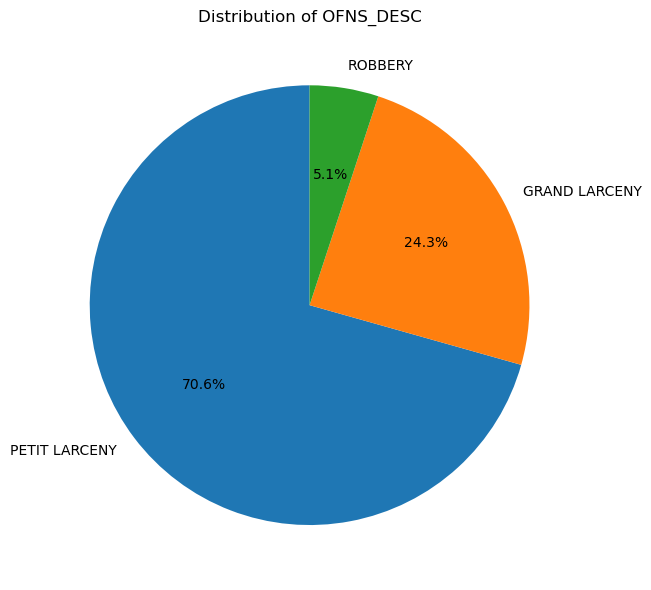

In [10]:
# Count the occurrences of each OFNS_DESC
ofns_desc_counts = df['OFNS_DESC'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
ofns_desc_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    labels=ofns_desc_counts.index,  # Add labels inside the pie
    legend=False
)

# Add title
plt.title('Distribution of OFNS_DESC')

# Display the plot
plt.ylabel('')  # Remove the y-axis label for better appearance
plt.tight_layout()
plt.show()


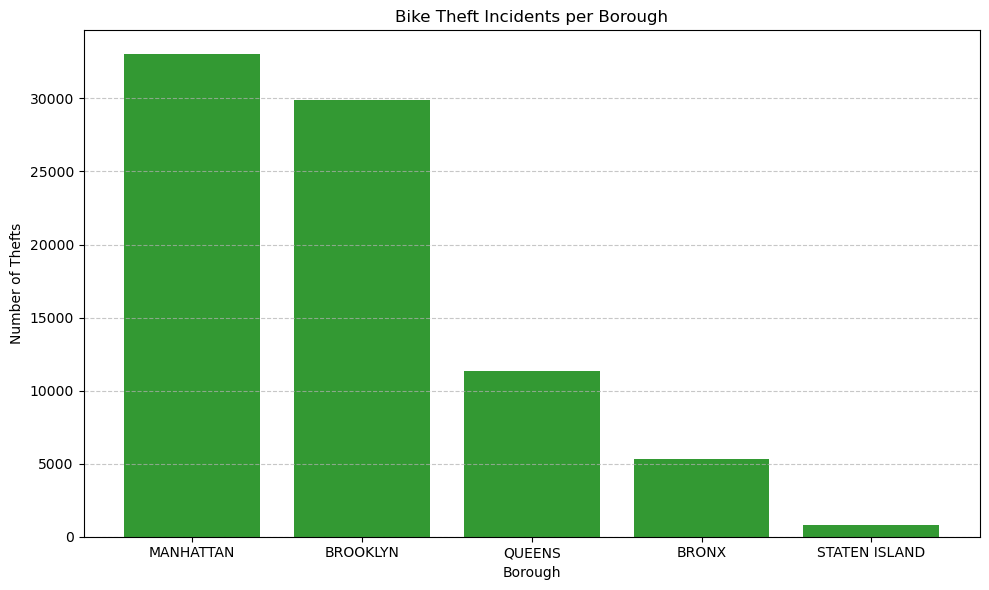

In [11]:
# Count the number of crimes per borough
boro_counts = df[df['BORO_NM'] != '(null)']['BORO_NM'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(boro_counts.index, boro_counts.values, color='Green', alpha=0.8)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Thefts')
plt.title('Bike Theft Incidents per Borough')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

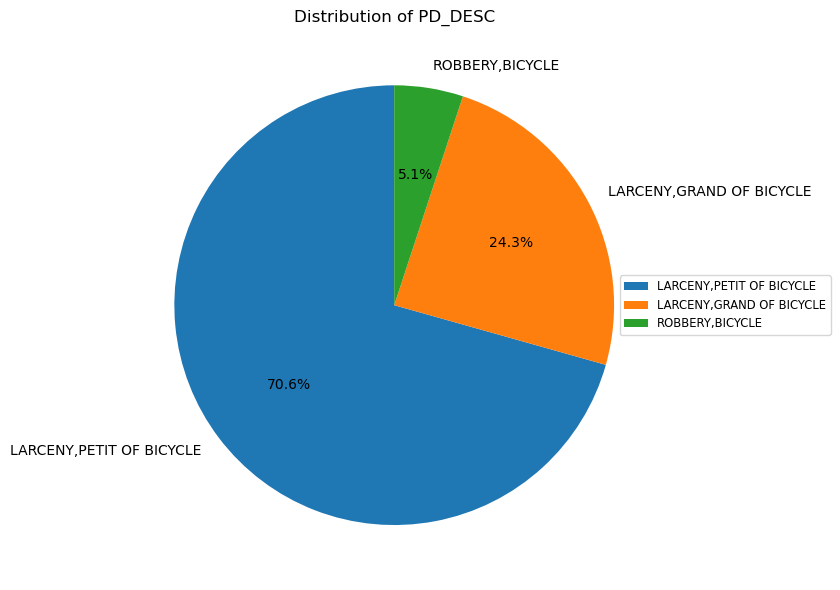

In [12]:
# Count the occurrences of each PD_DESC
pd_desc_counts = df['PD_DESC'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
pd_desc_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)

# Add title
plt.title('Distribution of PD_DESC')

# Add legend inside the plot
plt.legend(pd_desc_counts.index, loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize='small')

# Display the plot
plt.ylabel('')  # Remove the y-axis label for better appearance
plt.tight_layout()
plt.show()

In [13]:
# Combine VIC_AGE_GROUP, VIC_RACE, and VIC_SEX into one column
df['VIC_PROFILE'] = df['VIC_AGE_GROUP'] + ', ' + df['VIC_RACE'] + ', ' + df['VIC_SEX']

# Find the most common profile
most_common_profile = df['VIC_PROFILE'].value_counts().idxmax()
most_common_profile_count = df['VIC_PROFILE'].value_counts().max()

most_common_profile, most_common_profile_count

('25-44, WHITE, M', 12150)

In [14]:
# Combine SUSP_AGE_GROUP, SUSP_RACE, and SUSP_SEX into one column
df['SUSP_PROFILE'] = df['SUSP_AGE_GROUP'] + ', ' + df['SUSP_RACE'] + ', ' + df['SUSP_SEX']

# Find the most common suspect profile
most_common_susp_profile = df['SUSP_PROFILE'].value_counts().idxmax()
most_common_susp_profile_count = df['SUSP_PROFILE'].value_counts().max()

df['SUSP_AGE_GROUP'].unique()

array(['UNKNOWN', '(null)', '25-44', '18-24', '45-64', '<18', '65+',
       '2020', '2019', '2013'], dtype=object)

In [47]:
import seaborn as sns  

    # Create a pivot table with years as columns and months as rows
heatmap_data = df.groupby([df['CMPLNT_FR_DT'].str[-4:], df['CMPLNT_FR_DT'].str[:2]]).size().unstack(fill_value=0).T

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Incidents by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

KeyError: 'CMPLNT_FR_DT'

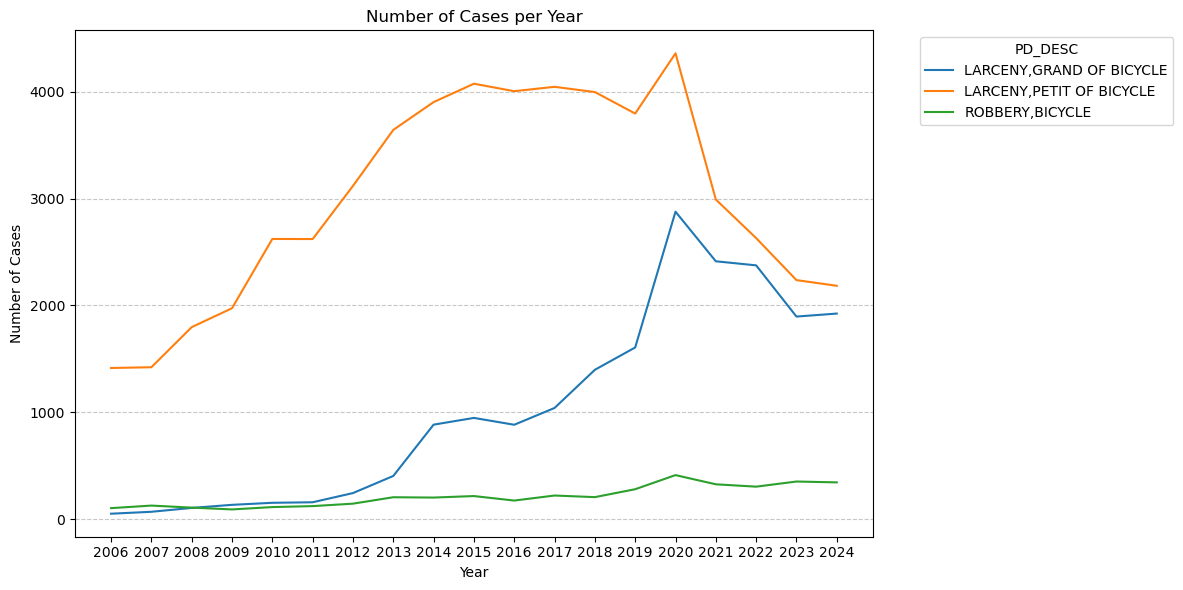

In [16]:
# Convert the 'CMPLNT_FR_DT' column to datetime and extract the year
df['Year'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').dt.year
# Filter the data for years between 2006 and 2024
df = df[(df['Year'] >= 2006) & (df['Year'] <= 2024)]
# Group by year and PD_DESC to count the number of cases
line_chart_data_yearly = df.groupby(['Year', 'PD_DESC']).size().unstack(fill_value=0)

# Plot the line chart
plt.figure(figsize=(12, 6))
line_chart_data_yearly.plot(ax=plt.gca(), marker='')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases per Year')
plt.legend(title='PD_DESC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks to integer years
plt.xticks(ticks=line_chart_data_yearly.index, labels=line_chart_data_yearly.index.astype(int))

plt.tight_layout()
plt.show()

In [17]:
unique_vic_age_groups = df['VIC_AGE_GROUP'].unique()
unique_vic_races = df['VIC_RACE'].unique()
unique_vic_sexes = df['VIC_SEX'].unique()


In [18]:
df['VIC_SEX'].value_counts()

M    56388
F    17735
D     5633
E      712
L        3
Name: VIC_SEX, dtype: int64

In [19]:
# Filter out rows where VIC_AGE_GROUP is '(null)'
df = df[df['VIC_AGE_GROUP'] != '(null)']

# Filter out rows where VIC_RACE is '(null)'
df = df[df['VIC_RACE'] != '(null)']

# Filter out rows where VIC_SEX is '(null)'
df = df[df['VIC_SEX'] != '(null)']

In [20]:
# Define the list of unwanted age groups
unwanted_age_groups = ['(null)', '-2', '-971', '1013', '929', '943', '971', '957']

# Filter the dataframe
df = df[~df['VIC_AGE_GROUP'].isin(unwanted_age_groups)]
df = df[df['VIC_RACE']!= '(null)']

In [21]:
# Plot the heatmap for the sorted data
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_race_age, annot=False, fmt="d", cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Count'})

# Add title and labels
plt.title('Heatmap of Victim Age Group and Race')
plt.xlabel('Victim Race')
plt.ylabel('Victim Age Group')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


NameError: name 'matrix_race_age' is not defined

<Figure size 1200x800 with 0 Axes>

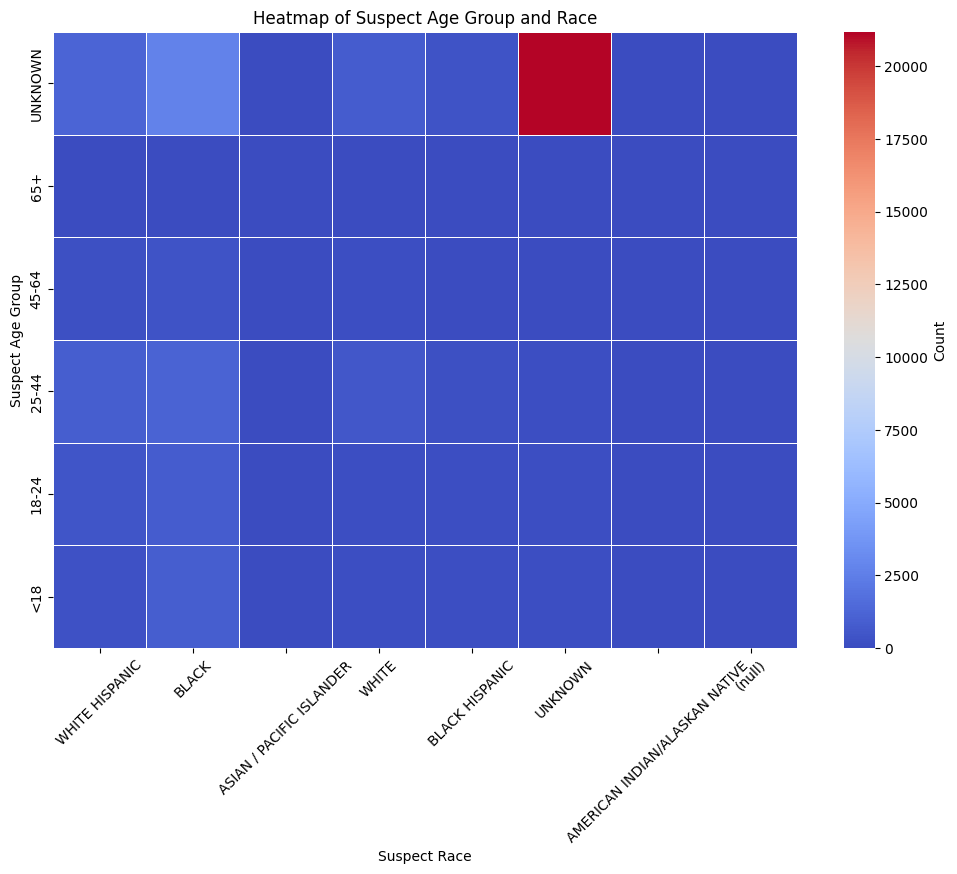

In [ ]:
# Create a pivot table for suspects' race and age group
matrix_susp_race_age = (
    df.groupby(['SUSP_AGE_GROUP', 'SUSP_RACE'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=age_order, columns=unique_vic_races, fill_value=0)
)

# Plot the heatmap for the sorted data for suspects
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_susp_race_age, annot=False, fmt="d", cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Count'})

# Add title and labels
plt.title('Heatmap of Suspect Age Group and Race')
plt.xlabel('Suspect Race')
plt.ylabel('Suspect Age Group')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
df['SUSP_RACE'].value_counts()


SUSP_RACE
(null)                            37741
UNKNOWN                           26900
BLACK                              6586
WHITE HISPANIC                     3370
WHITE                              1841
BLACK HISPANIC                     1009
ASIAN / PACIFIC ISLANDER            208
AMERICAN INDIAN/ALASKAN NATIVE       19
Name: count, dtype: int64

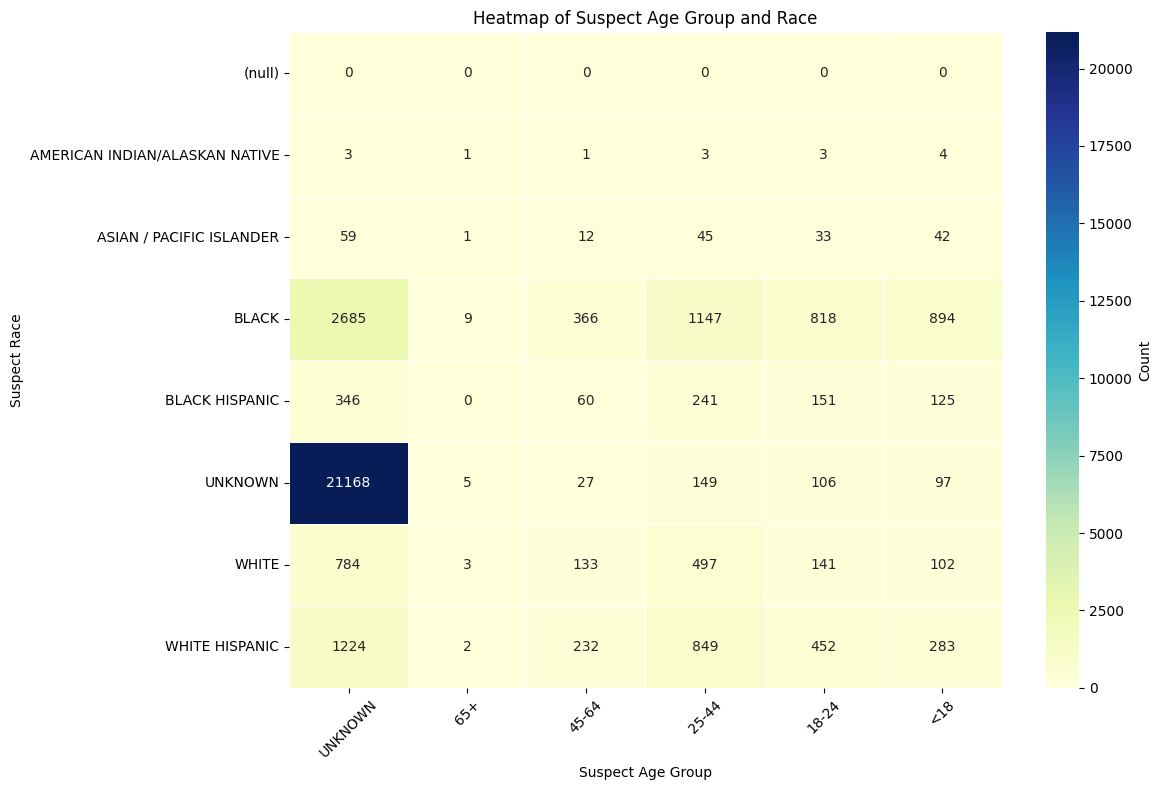

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Group the data and reshape it into a pivot table
heatmap_data = df.groupby('SUSP_RACE')['SUSP_AGE_GROUP'].value_counts().unstack(fill_value=0)

# Reorder the rows and columns based on `age_order` and the unique values of `SUSP_RACE`
heatmap_data = heatmap_data.reindex(columns=age_order, fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Count'})

# Add title and labels
plt.title('Heatmap of Suspect Age Group and Race')
plt.xlabel('Suspect Age Group')
plt.ylabel('Suspect Race')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()